## Labortary 2: Computer vision

part 1: MNIST Digit Classification

In [ ]:
import tensorflow as tf
!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

assert len(tf.config.list_physical_devices('GPU')) > 0

In [3]:
tf.__version__

'2.8.2'

MNIST dataset

In [4]:
#load the dataset

mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)

test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28, 1)

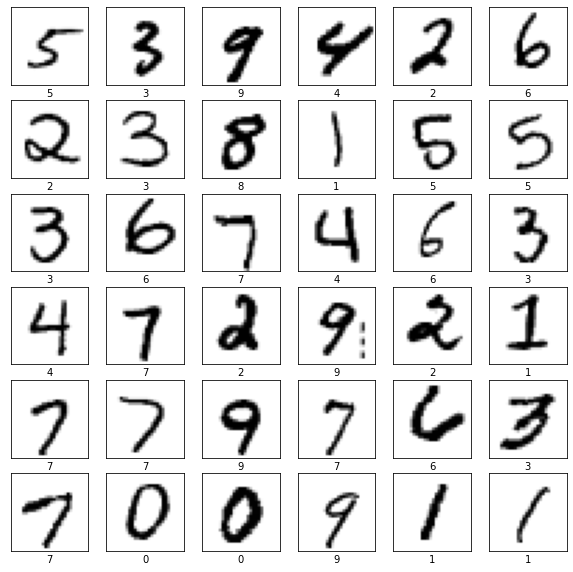

In [6]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

Neural Network for Handwritten Digit Classification

In [70]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),

      # '''TODO: Define the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(128, activation= "relu"),

      # '''TODO: Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation= "sigmoid")
      
  ])
  return fc_model

model = build_fc_model()

In [67]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=1e-1),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [68]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3740 - accuracy: 0.8946
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2007 - accuracy: 0.9429
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1518 - accuracy: 0.9570
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1224 - accuracy: 0.9654
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1032 - accuracy: 0.9711


In [69]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1071 - accuracy: 0.9679
Test accuracy: 0.9678999781608582


In [71]:
#using different optimizers and different learning rate
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 3s 2ms/step - loss: 0.2980 - accuracy: 0.9179
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1321 - accuracy: 0.9629
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0917 - accuracy: 0.9740
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0683 - accuracy: 0.9801
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0552 - accuracy: 0.9839


In [72]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0817 - accuracy: 0.9745
Test accuracy: 0.9745000004768372


Convolutional Neural Network (CNN) for handwritten digit classification

In [103]:
#Define the CNN model

def build_cnn_model():
  cnn_model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), padding='valid', input_shape=(28, 28, 1), activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=2),
      tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), padding="valid"),
      tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])


  return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 36)         0         
 g2D)                                                            
                                                                 
 flatten_31 (Flatten)        (None, 900)               0         
                                                                 
 dense_62 (Dense)            (None, 128)             

Train and test the CNN model

In [100]:
cnn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [101]:
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1779 - accuracy: 0.9474
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0491 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0345 - accuracy: 0.9896
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0247 - accuracy: 0.9922
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0189 - accuracy: 0.9938


In [102]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0361 - accuracy: 0.9890
Test accuracy: 0.9890000224113464


In [ ]:
#another try with SGD

In [104]:
cnn_model.compile(optimizer=tf.optimizers.SGD(learning_rate=1e-1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [105]:
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2252 - accuracy: 0.9305
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0669 - accuracy: 0.9790
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0472 - accuracy: 0.9855
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0360 - accuracy: 0.9888
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0279 - accuracy: 0.9914


In [106]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0397 - accuracy: 0.9867
Test accuracy: 0.9866999983787537


Make predictions

In [107]:
predictions = cnn_model.predict(test_images)

In [108]:
predictions[0]

array([5.2029314e-08, 8.9643339e-07, 2.1930753e-06, 1.6736540e-05,
       2.3763960e-10, 4.1968274e-08, 1.2300850e-12, 9.9997807e-01,
       3.0878304e-08, 2.0267319e-06], dtype=float32)

In [112]:
prediction = tf.argmax(predictions[0], axis=0).numpy()

print(prediction)

7


Label of this digit is: 7


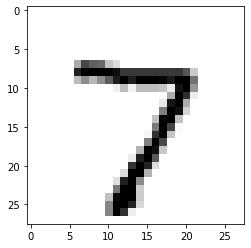

In [113]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

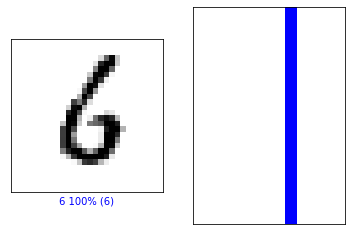

In [120]:
#@title Change the slider to look at the model's predictions! { run: "auto" }
image_index = 50 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

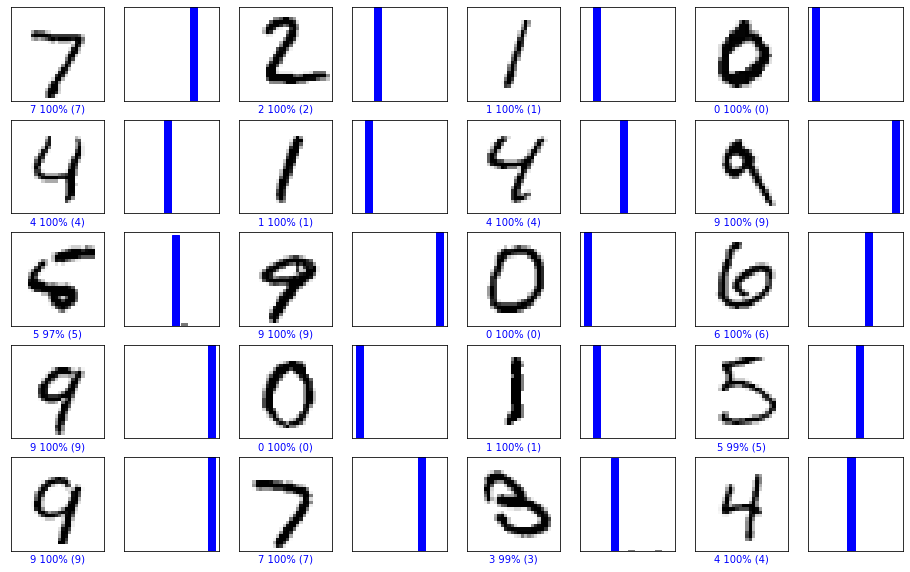

In [121]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

Training the model 2.0

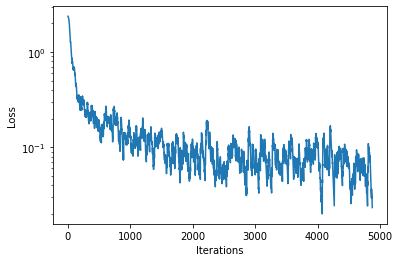

100%|██████████| 5000/5000 [00:50<00:00, 98.71it/s] 


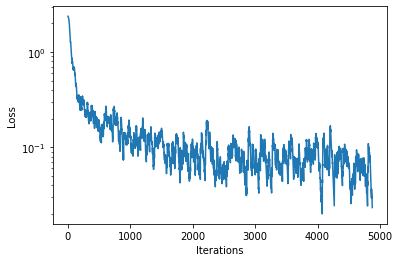

In [123]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    #'''TODO: feed the images into the model and obtain the predictions'''
    logits = cnn_model(images)

    #'''TODO: compute the categorical cross entropy loss
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits) # TODO

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation
  '''TODO: Use the tape to compute the gradient against all parameters in the CNN model.
      Use cnn_model.trainable_variables to access these parameters.''' 
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))